##Exercise2

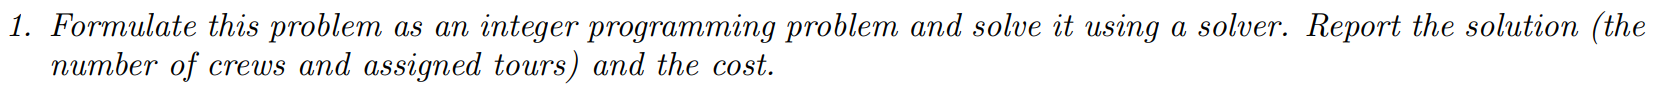

In [1]:
import numpy as np
import time

# Define subsets and corresponding costs
my_subsets = [
    {0, 3, 7, 9},
    {1, 4, 8, 11},
    {3, 6, 7, 9},
    {0, 8, 10, 13},
    {0, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 5, 6, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 3, 4, 10, 11}
]
my_costs = [45, 45, 45, 45, 35, 55, 55, 60, 60]

# Create incidence matrix
my_incidence_mat = np.zeros((len(my_subsets), 14))

# Fill in the matrix based on the subsets
for i, my_subset in enumerate(my_subsets):
    for flight_index in my_subset:
        my_incidence_mat[i, flight_index] = 1

# Display the incidence matrix
print(my_incidence_mat)


[[1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]


**Concept of Incidence Matrix**

The incidence matrix plays a fundamental role in combinatorial optimization, particularly in scenarios like crew assignment to flights. It serves as a mathematical representation that elucidates the relationship between two sets of objects: tours (or crew assignments) and flights. Each row of the incidence matrix corresponds to a tour, while each column represents a flight. Utilizing binary notation, the matrix indicates whether a specific flight is included in a particular tour. For instance,

 if the entry incidence_mat[i][j] is 1, it implies that flight j is part of tour i; conversely, a value of 0 indicates exclusion.

By scrutinizing the rows of the incidence matrix, one can discern which flights are encompassed within each tour. This information proves invaluable in optimization problems where the objective entails assigning crews to flights while minimizing costs or maximizing efficiency. Essentially, the incidence matrix offers a structured means of representing the intricate relationship between tours and flights, facilitating the analysis and resolution of crew assignment challenges.

In [2]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils
from pyomo.environ import*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

Optimization Problem: Crew Assignment

The optimization problem aims to assign crews to flights while minimizing the total cost associated with crew assignments. This problem is formulated as a binary integer programming problem, where the objective is to minimize the total cost of selected tours.

Mathematical Formulation:
\begin{align*}
& \text{Minimize} \quad \sum_{i=1}^{8} x_i \cdot \text{costs}[i] \
& \text{subject to} \
& \sum_{j=1}^{8} \text{incidence_mat}[i][j] \cdot x_j \geq 1 \quad \text{for all} \quad i \in {1, 2, \ldots, 8} \
& x_i \in {0, 1} \quad \text{for all} \quad i \in {1, 2, \ldots, 8}
\end{align*}

In this formulation:

xi
  is a binary decision variable representing whether tour i

is selected (1) or not (0).
The objective is to minimize the total cost of selected tours, represented by the summation of xi
  multiplied by the corresponding cost
costs

costs[i] for each tour i


The constraints ensure that each flight is covered by at least one selected tour. The summation of the product of incidence matrix entries and decision variables for each tour

i must be greater than or equal to 1, indicating that at least one tour covers each flight.

x
i

  can take binary values, indicating whether a tour is selected (1) or not (0).
This formulation ensures efficient crew assignment while meeting the coverage requirements for all flights and minimizing the total cost of crew assignments.

In [3]:
model = ConcreteModel()
model.x = Var(range(8),domain=Binary)
model.obj = Objective(expr=sum(model.x[i]*my_costs[i] for i in range(8)), sense=minimize)
model.constraints = ConstraintList()
for i in range(8):
    model.constraints.add(sum(my_incidence_mat[i][j] * model.x[j] for j in range(8)) >= 1)
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
start_time_ip = time.time()
result = solver.solve(model)
print(result)
end_time_ip = time.time()
print("Decision Variables:")
for i in range(8):
    print(f"x[{i}] =", value(model.x[i]))


Problem: 
- Name: unknown
  Lower bound: 145.0
  Upper bound: 145.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 8
  Number of nonzeros: 19
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.005010128021240234
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Decision Variables:
x[0] = 1.0
x[1] = 1.0
x[2] = 0.0
x[3] = 0.0
x[4] = 0.0
x[5] = 0.0
x[6] = 1.0
x[7] = 0.0


In [4]:
num_crews_used = sum(value(model.x[i]) for i in range(8))
print("Number of crews used:",num_crews_used)
print("Crews used:")
for i in range(8):
    if value(model.x[i]) == 1:
        print(f"Crew {i}")
total_cost_ip_1=sum(value(model.x[i])*my_costs[i] for i in range(8))
print("Total cost incurred in 10k INR is :",total_cost_ip_1)

Number of crews used: 3.0
Crews used:
Crew 0
Crew 1
Crew 6
Total cost incurred in 10k INR is : 145.0


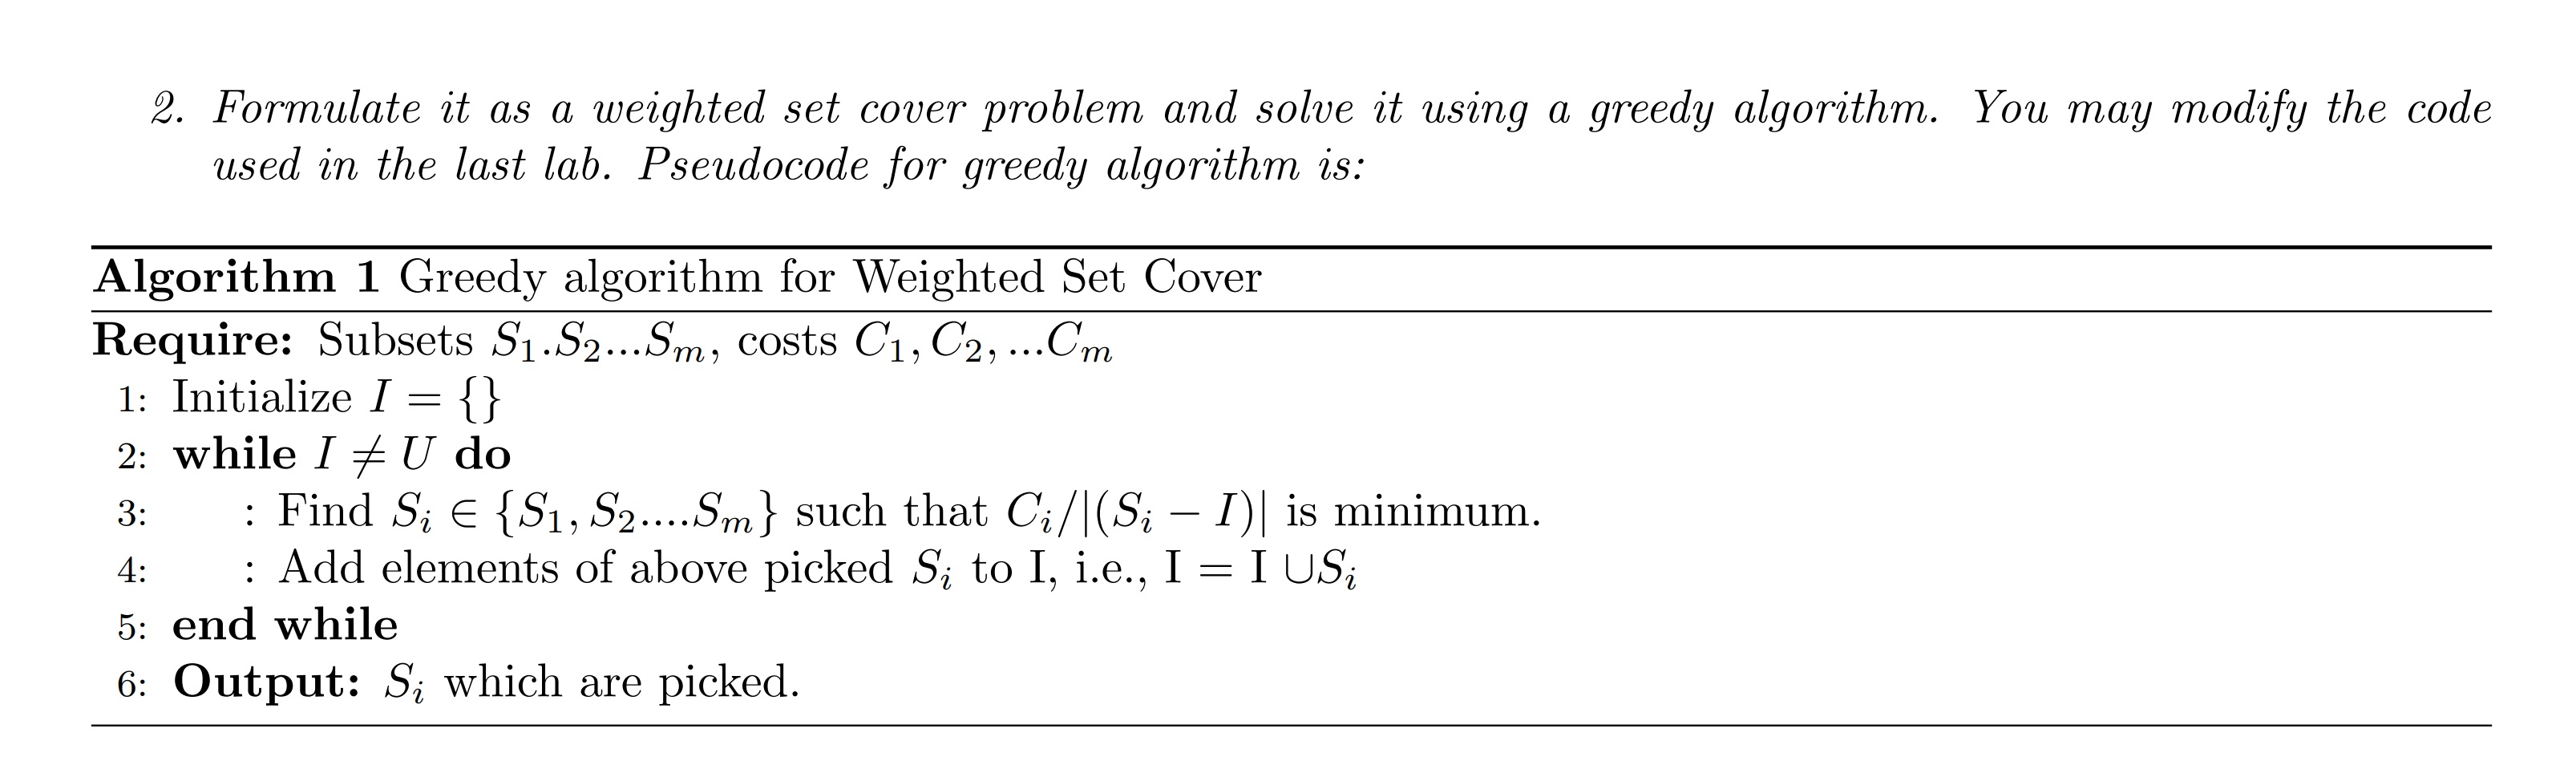


In this context, the universal set encompasses all the flights that require coverage. Referring to the provided table, we can discern the unique flights as follows:

Mumbai to Chennai, Mumbai to Guwahati, Delhi to Mumbai, Delhi to Chennai, Delhi to Kolkata, Kolkata to Delhi, Chennai to Mumbai, Chennai to Kolkata, Chennai to Guwahati, Guwahati to Delhi.

Therefore, the universal set comprises these flights:


=
{
Mumbai to Chennai

,
Mumbai to Guwahati

,
Delhi to Mumbai

,
Delhi to Chennai

,
Delhi to Kolkata

,
Kolkata to Delhi

,
Chennai to Mumbai

,
Chennai to Kolkata

,
Chennai to Guwahati

,
Guwahati to Delhi
}

U={Mumbai to Chennai,Mumbai to Guwahati,Delhi to Mumbai,Delhi to Chennai,Delhi to Kolkata,Kolkata to Delhi,Chennai to Mumbai,Chennai to Kolkata,Chennai to Guwahati,Guwahati to Delhi}

Now, let's delineate the subsets based on the provided table. Each subset denotes a crew's feasible sequence of flights. For instance:

Subset 1: Crew's sequence of flights for Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi.

Subset 2: Crew's sequence of flights for Mumbai to Guwahati, Mumbai to Guwahati, and Chennai to Kolkata.

Subset 3: Crew's sequence of flights for Delhi to Mumbai, Delhi to Chennai, and Guwahati to Delhi.
... and so forth.


Each subset is characterized by the flights that the crew must cover. For instance, Subset 1 comprises flights from Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi, indicating the flights this crew is tasked to cover.

The rationale behind selecting these subsets is to ensure representation of each crew's feasible flight sequences. This facilitates the identification of the minimum cost combination of crews to efficiently cover all flights. Each subset corresponds to a crew's potential flight sequence, and our objective is to determine the minimum number of crews required to cover all flights.

In [6]:
def greedy_weighted_set_cover(my_subsets, my_costs, my_universal_set):
    I = set()
    my_subsets_used = []
    while I != set(my_universal_set):
        cost_cover_ratio = []
        for i in range(len(my_subsets)):
            remaining_elements = my_subsets[i] - I
            if len(remaining_elements) > 0:
                ratio = my_costs[i] / len(remaining_elements)
                cost_cover_ratio.append((ratio, i))
        if not cost_cover_ratio:
            break
        min_ratio, min_ratio_index = min(cost_cover_ratio)
        I = I.union(my_subsets[min_ratio_index])
        my_subsets_used.append(min_ratio_index)
    return my_subsets_used

start_time_greedy = time.time()
selected_subsets = greedy_weighted_set_cover(my_subsets, my_costs, range(14))
end_time_greedy = time.time()
print("feasible subsets are :", selected_subsets)


feasible subsets are : [5, 6, 1, 4]


In [9]:
total_cost_greedy1 = 0
for i in selected_subsets:
  total_cost_greedy1 = total_cost_greedy1 + my_costs[i]
print("The total cost for greedy 1  in 10k INR is:" ,total_cost_greedy1)

The total cost for greedy 1  in 10k INR is: 190


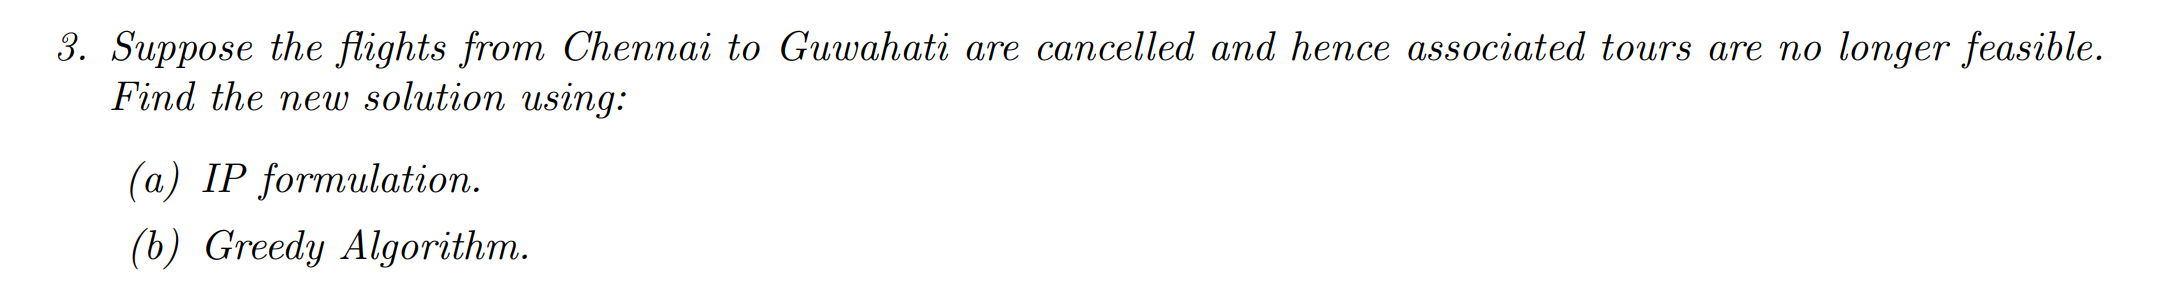

In [10]:
updated_incidence_mat = np.delete(my_incidence_mat, 5, axis=1)  # Remove the 6th column (index 5)

model = ConcreteModel()
model.x = Var(range(8), domain=Binary)
model.obj = Objective(expr=sum(model.x[i]*my_costs[i] for i in range(8)), sense=minimize)
model.constraints = ConstraintList()
for i in range(8):
    model.constraints.add(sum(updated_incidence_mat[i][j] * model.x[j] for j in range(7)) >= 1)
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
start_time_ip1 = time.time()
result = solver.solve(model)
end_time_ip1 = time.time()

num_crews_used = sum(value(model.x[i]) for i in range(8))
print("Number of crews used:", num_crews_used)

print("Crews used:")
for i in range(8):
    if value(model.x[i]) == 1:
        print(f"Crew {i}")

total_cost_lp2 = sum(value(model.x[i]) * my_costs[i] for i in range(8))
print("Total cost incurred:", total_cost_lp2)

Number of crews used: 3.0
Crews used:
Crew 0
Crew 1
Crew 5
Total cost incurred: 145.0


In [12]:
# Defining the updated subsets and costs (excluding Chennai to Guwahati)
subsets_without_chennai_guwahati = [
    {0, 3, 7, 9},
    {1, 4, 8, 11},
    {3, 6, 7, 9},
    {0, 8, 10, 13},
    {0, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 5, 6, 10, 12},
    {1, 3, 7, 9, 13},
    {2, 3, 4, 10, 11}]

costs_without_chennai_guwahati = [45, 45, 45, 45, 35, 55, 55, 60, 60]
# Calling the greedy algorithm with updated subsets and costs
start_time_greedy1= time.time()
selected_subsets_greedy = greedy_weighted_set_cover(subsets_without_chennai_guwahati, costs_without_chennai_guwahati, range(14))
print("Feasible subsets using Greedy Algorithm are:", selected_subsets_greedy)
end_time_greedy1 = time.time()
total_cost_greedy2 = 0
for i in selected_subsets_greedy:
  total_cost_greedy2 = total_cost_greedy2 + my_costs[i]
print("The total cost in greedy 2 in 10k INR is:" ,total_cost_greedy2)

Feasible subsets using Greedy Algorithm are: [5, 6, 1, 4]
The total cost in greedy 2 in 10k INR is: 190


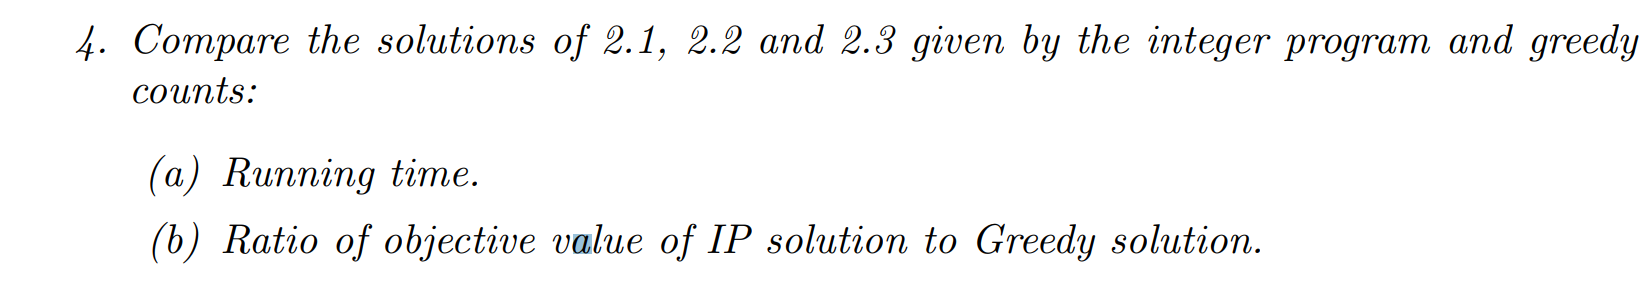

# 1st case

In [13]:
running_time_ip =end_time_ip-start_time_ip
objective_value_ip =total_cost_ip_1
running_time_greedy =end_time_greedy-start_time_greedy
objective_value_greedy=total_cost_greedy1

ratio_objective_values =objective_value_ip/objective_value_greedy

print("The Runnig time incurred using IP solver is:",running_time_ip)
print("The Running Time incurred Using Greedy Algorithm IS", running_time_greedy)
print("The Ratio Obtained For Objectives OF IP to Greedy IS:",ratio_objective_values)

The Runnig time incurred using IP solver is: 0.12010431289672852
The Running Time incurred Using Greedy Algorithm IS 0.00030040740966796875
The Ration Obtained For Objectives OF IP to Greedy IS: 0.7631578947368421


# 2nd case

In [14]:
running_time_ip =end_time_ip1-start_time_ip1
objective_value_ip =total_cost_lp2
running_time_greedy =end_time_greedy1-start_time_greedy1
objective_value_greedy=total_cost_greedy2

ratio_objective_values =objective_value_ip/objective_value_greedy

print("The Runnig time incurred using IP solver is",running_time_ip)
print("The Running Time incurred Using Greedy Algorithm IS", running_time_greedy)
print("The Ratio Obtained For Objectives OF IP to Greedy IS:",ratio_objective_values)

The Runnig time incurred using IP solver is 0.018372058868408203
The Running Time incurred Using Greedy Algorithm IS 0.001810312271118164
The Ratio Obtained For Objectives OF IP to Greedy IS: 0.7631578947368421
